Scenario:
We are working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. We are looking for patterns in the available information from competing ride-sharing companies. We will:
- identify the top 10 neighborhoods in terms of drop-offs
- examine the relationship between top 10 neighborhoods by number of dropoffs with graphs
- examine the relationship between taxi companies and number of rides with graphs
- test the hypothesis "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# global settings for graphs
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [3]:
# import sys and insert code to ignore warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
# import the files
try:
    name_df = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff_df = pd.read_csv('/datasets/project_sql_result_04.csv')
    start_df = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    print('ERROR: Unable to find or access file.')

In [5]:
# print the first 5 rows
print('\nRows of name_df table')
name_df.head()


Rows of name_df table


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
# df general info
print('\nGeneral info of name_df table\n')
print(name_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', name_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', name_df.shape)
# check df col for unique values
print('\nNumber of unique company names:', name_df.company_name.nunique())


General info of name_df table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Number of duplicate rows: 0

Number rows and columns: (64, 2)

Number of unique company names: 64


We note:
- name_df has 2 columns (company_name, trips_amount) in 64 rows
- the datatypes for company_name (object) and trips_amount (int64) are appropriate
- company_name is the unique name of the cab company
- trips_amount is the number of rides for each taxi company on November 15-16, 2017

In [7]:
# print the first 5 rows of the dataframe
print('\nFirst 5 rows of dropoff_df table')
dropoff_df.head()


First 5 rows of dropoff_df table


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
# df general info
print('\nGeneral info of dropoff_df table\n')
print(dropoff_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', dropoff_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', dropoff_df.shape)
# check df col for unique values
print('\nNumber of unique dropoff locations:', \
      dropoff_df.dropoff_location_name.nunique())


General info of dropoff_df table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Number of duplicate rows: 0

Number rows and columns: (94, 2)

Number of unique dropoff locations: 94


We note:
- name_df has 2 columns (dropoff_location_name, average_trips) in 94 rows
- the datatype for company_name (object) is appropriate
- the datatype for average_trips (float64) should be changed to int
- dropoff_location_name is the unique name of the cab company
- average_trips is the average number of rides that ended in each neighborhood in November 2017.

In [9]:
# change datatype for average_trips to int
dropoff_df.average_trips = dropoff_df.average_trips.apply(np.int)
dropoff_df.average_trips = dropoff_df.average_trips.astype('int64')
print('Data type for average_trips:', dropoff_df.average_trips.dtype)

Data type for average_trips: int64


In [10]:
# identify the top 10 neighborhoods in terms of drop-offs
print('Top 10 dropoff locations')
dropoff_df.head(10)

Top 10 dropoff locations


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


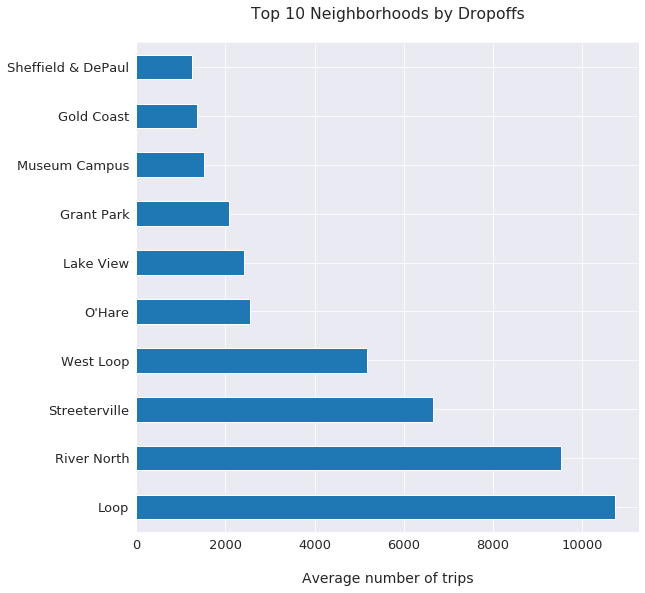

In [11]:
# create bar chart to demonstrate proportionality of top 10
top_dropoff_df = dropoff_df.head(10)
top_dropoff_df.plot(kind='barh', figsize=(9,9), y='average_trips',\
                    legend=False, x='dropoff_location_name')
plt.title('Top 10 Neighborhoods by Dropoffs\n')
plt.ylabel("")
plt.xlabel("\nAverage number of trips")
plt.show()

From this bar graph, we observe the top 3 dropoff locations appear to account for over half the rides. We will use a pie chart for further visualization and then follow up with some calculations.

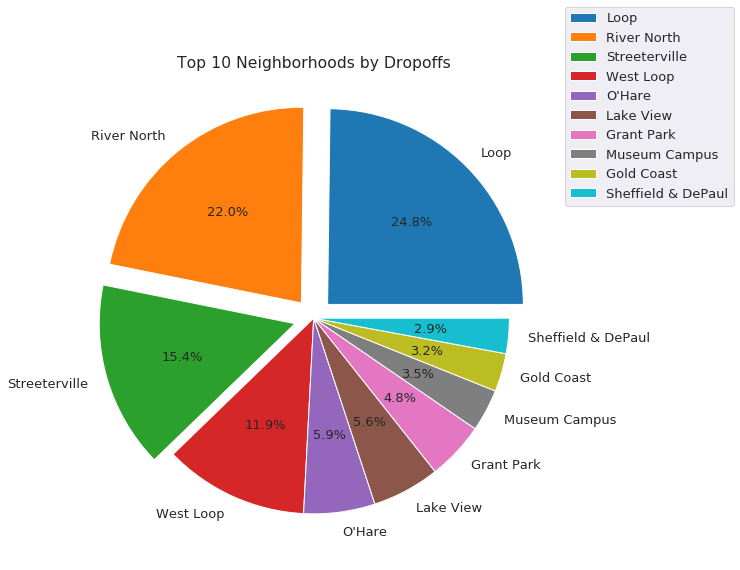

In [12]:
# create pie chart to demonstrate proportionality of top 10
top_dropoff_df = dropoff_df.head(10)
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)
top_dropoff_df.plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', y='average_trips', \
                    labels=top_dropoff_df.dropoff_location_name, explode = explode)
plt.title('Top 10 Neighborhoods by Dropoffs')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1.15), ncol=1)
plt.ylabel("")
plt.show()

It is clear that the top 3 locations, Loop, River North, and Streeterville, account for over half of the total percent for the top 10. 

It is important for Zuber to understand their market. We now know the clear top 3 neighborhoods (from the top 10 of 94) account for over half of the top 10's market share. This  will help Zuber with resource allocation and marketing.

This leads to a questions about the overall market share for the top 10 neighborhoods versus the other 54 neighborhoods. 

In [13]:
total_rides = sum(dropoff_df.average_trips)
total_rides_top_3 = sum(dropoff_df.average_trips[0:3])
total_rides_top_10 = sum(dropoff_df.average_trips[0:10])
pct_top_10 = "{:.0%}". format((total_rides_top_10/total_rides))
pct_top_3 = "{:.0%}". format((total_rides_top_3/total_rides))
print('For November 2017, there were a total of', total_rides, 'Zuber trips and',\
     total_rides_top_10, 'Zuber trips ended at one of the top 10 neighborhoods by', \
     'number of dropoffs. That means over', pct_top_10, 'of the trips ended in a top',\
     '10 location. Also, over', pct_top_3, 'of the total trips ended in one of the top 3',\
     'locations.')

For November 2017, there were a total of 56351 Zuber trips and 43244 Zuber trips ended at one of the top 10 neighborhoods by number of dropoffs. That means over 77% of the trips ended in a top 10 location. Also, over 48% of the total trips ended in one of the top 3 locations.


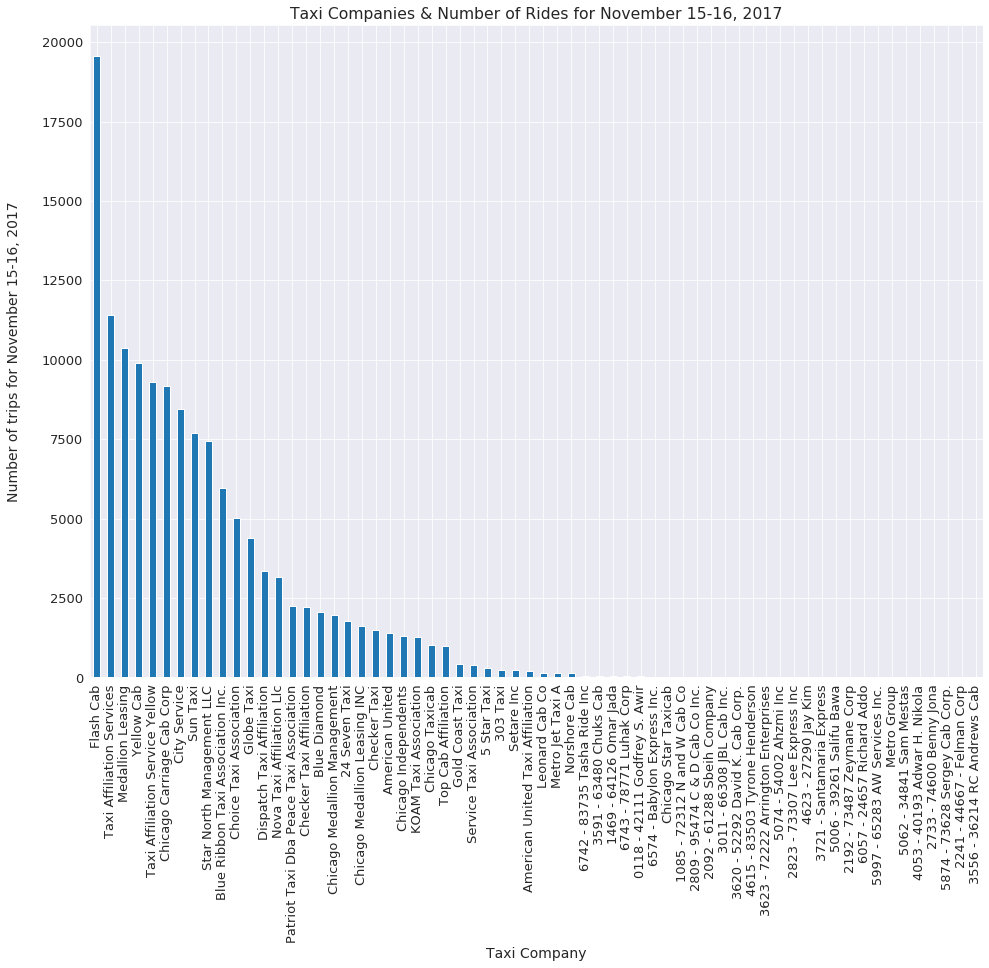

In [14]:
# graph taxi companies and number of rides

name_df.plot(kind='bar', x= 'company_name', figsize=(16,12), legend=False)
plt.title('Taxi Companies & Number of Rides for November 15-16, 2017')
#plt.legend(loc="upper left", bbox_to_anchor=(1, 1.15), ncol=1, )
plt.ylabel("Number of trips for November 15-16, 2017\n")
plt.xlabel('Taxi Company')
plt.show()

In [15]:
total = sum(name_df.trips_amount)
flash = (name_df.trips_amount[0])
pct_flash = flash/total * 100
pct_flash = pct_flash.round(2)
top_10 = sum(name_df.trips_amount[0:6])
pct_top_10 = top_10/total * 100
pct_top_10 = round(pct_top_10, 2) 
print('There were a total of', total, 'rides for November 15-16, 2017 and', flash, 'were from the Flash Cab company. \n'
'So Flash Cab accounted for', pct_flash, 'percent of the total rides. We also observe that the top 7 Taxi Companies \n'
      'accounted for', pct_top_10, 'percent of total rides.')

There were a total of 137311 rides for November 15-16, 2017 and 19558 were from the Flash Cab company. 
So Flash Cab accounted for 14.24 percent of the total rides. We also observe that the top 7 Taxi Companies 
accounted for 50.77 percent of total rides.


We observe that Flash Cab has a majority of the rides from all rides per company on November 15-16, 2017 and recommend further analysis of Flash Cab's data to help guide the marketing and resource allocation of Zuber. It would be interesting to see Flash Cab dropoff location data to discover if a majority of their dropoffs are in the top 10 or even top 3 dropoffs for November. Additionally, since a majority of the total rides are serviced by the top 7 performing Taxi Companies it would be useful to focus on those 7 companies as Zuber's main competitors.

Now we will test the the hypothesis "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

We will use the results of a query on the trips table that retrieved all the rides for a Saturday that started in the Loop and ended at O'Hare where weather conditions can be catgorized as Bad (description includes rain or storm) or Good (all other descriptions).

In [16]:
print('The distribution of weather conditions')
start_df.weather_conditions.value_counts()

The distribution of weather conditions


Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [17]:
# df general info
print('\nGeneral info of start_df table\n')
print(start_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', start_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', start_df.shape)


General info of start_df table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Number of duplicate rows: 197

Number rows and columns: (1068, 3)


start_ts needs to be changed to date time from object type.

Additionally, we observe there are many duplicate rows. Those duplicate rows may have been data entry errors in the original tables. We will run the hypothesis without the duplicate rows and with, just to make sure there is no difference in outcome.

In [18]:
# change start_ts to datetime
start_df.start_ts = pd.to_datetime(start_df.start_ts)
# creat a no_duplicates_df
no_duplicates_df = start_df.drop_duplicates()
# no_duplicates_df general info
print('\nGeneral info of no_duplicates_df table\n')
print(no_duplicates_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', no_duplicates_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', no_duplicates_df.shape)


General info of no_duplicates_df table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              871 non-null datetime64[ns]
weather_conditions    871 non-null object
duration_seconds      871 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None

Number of duplicate rows: 0

Number rows and columns: (871, 3)


In [19]:
# info on start_df
print('start_df variance =', np.var(start_df.duration_seconds))
start_df.describe()

start_df variance = 591516.0504451949


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [20]:
# info on no_duplicates_df
print('no_duplicates_df variance =', np.var(no_duplicates_df.duration_seconds))
no_duplicates_df.describe()

no_duplicates_df variance = 611251.1457197805


,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


We note there is an uneven distribution of good days and bad days, but there are enough of each to make a valid comparison.

We note there is a high variance in both dataframes (with and without duplicates), so we will use equal_var = False in our hypothesis test.

We will use an alpha of 0.05, the standard value because there is no reason to use a stricter or more forgiving benchmark.

Our task is to test "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 

$H_0$ The average duration of rides from the Loop to O'Hare International Airport on Saturdays when it is rainy (bad weather) - The average duration of rides from the Loop to O'Hare International Airport on Saturdays when there is no rain (good weather) = 0.

$H_A$ The average duration of rides from the Loop to O'Hare International Airport on Saturdays when it is rainy (bad weather) - The average duration of rides from the Loop to O'Hare International Airport on Saturdays when there is no rain (good weather) != 0.

In [21]:
print('Test for dataframe with duplicate values\n')

good_days = start_df[start_df.weather_conditions.isin(['Good'])]
bad_days = start_df[start_df.weather_conditions.isin(['Bad'])]
print('The average duration of rides when the weather is Good is', round(good_days['duration_seconds'].mean(), 2))
print('The average duration of rides when the weather is Bad is', round(bad_days['duration_seconds'].mean(), 2))

# use the standard critical value
alpha = 0.05 

# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(good_days.duration_seconds, bad_days.duration_seconds, equal_var = False)
print('\nNull hypothesis test for good weather and bad weather days')
print('where dataframe includes duplicate values.\n')
print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Test for dataframe with duplicate values

The average duration of rides when the weather is Good is 1999.68
The average duration of rides when the weather is Bad is 2427.21

Null hypothesis test for good weather and bad weather days
where dataframe includes duplicate values.

p-value: 6.738994326108734e-12

We reject the null hypothesis


In [22]:
print('Test for dataframe without duplicate values\n')

good_days_no_dup = no_duplicates_df[no_duplicates_df.weather_conditions.isin(['Good'])]
bad_days_no_dup = no_duplicates_df[no_duplicates_df.weather_conditions.isin(['Bad'])]
print('The average duration of rides when the weather is Good is', round(good_days['duration_seconds'].mean(), 2))
print('The average duration of rides when the weather is Bad is', round(bad_days['duration_seconds'].mean(), 2))

# use the standard critical value
alpha = 0.05 

# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(good_days_no_dup.duration_seconds, bad_days_no_dup.duration_seconds, equal_var = False)
print('\nNull hypothesis test for good weather and bad weather days')
print('where dataframe doesn\'t includes duplicate values.\n')
print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Test for dataframe without duplicate values

The average duration of rides when the weather is Good is 1999.68
The average duration of rides when the weather is Bad is 2427.21

Null hypothesis test for good weather and bad weather days
where dataframe doesn't includes duplicate values.

p-value: 9.126383933880083e-08

We reject the null hypothesis


We note the p-values are quite small and that the p-value for the dataframe with duplicates is smaller than the p-value for the dataframe without duplicates.

The small p-values indicate we can safely reject the null hypothesis and accept the alternate hypothesis as highly likely: 

$H_A$ The average duration of rides from the Loop to O'Hare International Airport on Saturdays when it is rainy (bad weather) - The average duration of rides from the Loop to O'Hare International Airport on Saturdays when there is no rain (good weather) != 0.

And that means we can accept the hypothesis we were assigned to test as very likely:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Additionally, we note that the rides on rainy/bad weather days are of a longer duration. This accords with common sense because people are often more cautious and drive slower during bad weather conditions.

References

[A Simple Guide to Beautiful Visulizations](https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392)

[Using round with float](https://stackoverflow.com/questions/65277758/float-object-has-no-attribute-round)